In [1]:
#==============================================================================
# Import libraries
#==============================================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
#==============================================================================
# Import Dataset
#==============================================================================

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('housing.csv', delim_whitespace=True, names=names)

In [3]:
#==============================================================================
# Data exploration
#==============================================================================


boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston.shape

(506, 14)

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [6]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
Target = boston['MEDV']

In [9]:
Features = boston.drop('MEDV', axis=1)

Text(0.5, 1.0, 'Boston feature correlation')

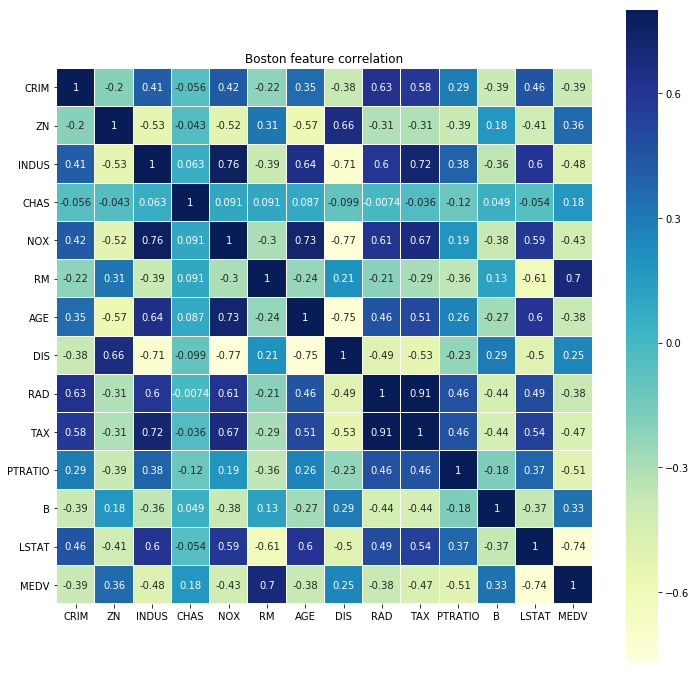

In [11]:
corr = boston.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmax=0.8, linewidths=0.01, linecolor='white', square=True, annot=True, cmap='YlGnBu')
plt.title('Boston feature correlation')

In [15]:
#==============================================================================
# Prepare data
# Get numpy array from dataframes
#==============================================================================

X = Features.values
y = Target.values


In [16]:
# Train / test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [17]:
# Fit algorithms

#==============================================================================
# Fitting the Linear Regression algo to the Training set
#==============================================================================

from sklearn.linear_model import LinearRegression
regressoragent = LinearRegression()
regressoragent.fit (X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
#==============================================================================
# Fitting the Lasso Regression algo to the Training set
#==============================================================================

from sklearn.linear_model import Lasso
Lasso_Reg = Lasso()
Lasso_Reg.fit (X_train, y_train )    

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
#==============================================================================
# Fitting the Ridge Regression algo to the Training set
#==============================================================================

from sklearn.linear_model import Ridge
Ridge_Reg = Ridge()
Ridge_Reg.fit (X_train, y_train )    

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
#==============================================================================
# Fitting the ElasticNet Regression algo to the Training set
#==============================================================================

from sklearn.linear_model import ElasticNet
ElasticNet_Reg = ElasticNet()
ElasticNet_Reg.fit (X_train, y_train )    

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
#==============================================================================
# Fitting the Decision Tree Regression algo to the Training set
#==============================================================================

from sklearn.tree import DecisionTreeRegressor
DT_Reg = DecisionTreeRegressor()
DT_Reg.fit (X_train, y_train )    

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [22]:
#==============================================================================
# Fitting the Random Forest Regression algo to the Training set
#==============================================================================

from sklearn.ensemble import RandomForestRegressor
RF_Reg = RandomForestRegressor()
RF_Reg.fit (X_train, y_train )  

C:\Users\armando_galeana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
#==============================================================================
# Fitting the SVM Regression algo to the Training set
#==============================================================================

from sklearn.svm import SVR
SV_Reg = SVR()
SV_Reg.fit (X_train, y_train )    

C:\Users\armando_galeana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
#==============================================================================
# Now check what our model learned by predicting the X_train values
#==============================================================================

LR_train_preds=regressoragent.predict(X_train)
Lasso_train_preds=Lasso_Reg.predict(X_train)
Ridge_train__preds=Ridge_Reg.predict(X_train)
ElasticNet_train__preds=ElasticNet_Reg.predict(X_train)
DT_train__preds=DT_Reg.predict(X_train)
RF_train__preds=RF_Reg.predict(X_train)
SVR_train__preds=SV_Reg.predict(X_train)

In [26]:
#==============================================================================
# Now check our model performance with training set
#==============================================================================

from sklearn.metrics import r2_score

LR_train_r2=r2_score(y_train, LR_train_preds)
Lasso_train_r2=r2_score(y_train,Lasso_train_preds)
Ridge_train__r2=r2_score(y_train, Ridge_train__preds)
ElasticNet_train__r2=r2_score(y_train,ElasticNet_train__preds)
DT_train__r2=r2_score(y_train, DT_train__preds)
RF_train__r2=r2_score(y_train, RF_train__preds)
SVR_train__r2=r2_score(y_train, SVR_train__preds)

In [28]:
#==============================================================================
# Now check what our model learned by predicting the X_test values
#==============================================================================

LR_test_preds=regressoragent.predict(X_test)
Lasso_test_preds=Lasso_Reg.predict(X_test)
Ridge_test__preds=Ridge_Reg.predict(X_test)
ElasticNet_test__preds=ElasticNet_Reg.predict(X_test)
DT_test__preds=DT_Reg.predict(X_test)
RF_test__preds=RF_Reg.predict(X_test)
SVR_test__preds=SV_Reg.predict(X_test)

In [29]:
#==============================================================================
# Now check our model performance with test set
#==============================================================================

LR_test_r2=r2_score(y_test, LR_test_preds)
Lasso_test_r2=r2_score(y_test,Lasso_test_preds)
Ridge_test__r2=r2_score(y_test, Ridge_test__preds)
ElasticNet_test__r2=r2_score(y_test,ElasticNet_test__preds)
DT_test__r2=r2_score(y_test, DT_test__preds)
RF_test__r2=r2_score(y_test, RF_test__preds)
SVR_test__r2=r2_score(y_test, SVR_test__preds)

In [30]:
print("LR train r2 =", LR_train_r2)
print("LR test r2 =", LR_test_r2)

print("Lasso train r2 =", Lasso_train_r2)
print("Lasso test r2 =", Lasso_test_r2)

print("Ridge train r2 =", Ridge_train__r2)
print("Ridge test r2 =", Ridge_test__r2)

print("ElasticNet train r2 =", ElasticNet_train__r2)
print("ElasticNet test r2 =", ElasticNet_test__r2)

print("DT train r2 =", DT_train__r2)
print("DT test r2 =", DT_test__r2)

print("RF train r2 =", RF_train__r2)
print("RF test r2 =", RF_test__r2)

print("SVR train r2 =", SVR_train__r2)
print("SVR test r2 =", SVR_test__r2)

LR train r2 = 0.7645451026942549
LR test r2 = 0.6733825506400173
Lasso train r2 = 0.7084095500978869
Lasso test r2 = 0.6115433359595555
Ridge train r2 = 0.7623440182689594
Ridge test r2 = 0.6665819091486687
ElasticNet train r2 = 0.7123645785314916
ElasticNet test r2 = 0.6172050826795714
DT train r2 = 1.0
DT test r2 = 0.6420952515460365
RF train r2 = 0.9777713382902472
RF test r2 = 0.8022016960845266
SVR train r2 = 0.14680479454982043
SVR test r2 = 0.010181065799472755
